# Fixed CNOT

# imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from qsim.logical_gate.process_results import *
from qsim.physical_gate.cnot import CNOTSFB
from qsim.utils.quantum_guidelines import global_setup, plot_setup
from qsim.utils.utils import (
    CNOT_control_phaseflip,
    error_bar,
    one_photon_loss_phaseflip,
)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(rc={"figure.facecolor": "white"})
global_setup()
%matplotlib inline
marker_list = ["o", "s", "v", "^", "<", ">", "D", "X", "P"]

Setup methods loaded


# pX

In [9]:
%%time
force_load = False
if not force_load:
    try:
        arr = np.load("FixedCNOT_raw_px_df.npy", allow_pickle=True)
        columns = [
            "fid",
            "pX2",
            "pY2",
            "pZ2",
            "pX1",
            "pX1X2",
            "pX1Y2",
            "pX1Z2",
            "pY1",
            "pY1X2",
            "pY1Y2",
            "pY1Z2",
            "pZ1",
            "pZ1X2",
            "pZ1Y2",
            "pZ1Z2",
            "k2a",
            "nbar",
            "truncature",
            "k1",
            "pX",
        ]
        dff = pd.DataFrame(arr, columns=columns)
    except FileNotFoundError:
        pass
else:
    GATE = CNOTSFB
    res = loading_results("20220330", GATE=GATE, distance_l=[])
    print(f"{len(res)=}")
    res_border = loading_results("20220401", GATE=GATE, distance_l=[])
    print(f"{len(res_border)=}")
    df = pd.DataFrame(res + res_border)
    dff = px_format_df(
        df=df,
        truncature_l=[10],
        k2a_l=[1],
        remove_deterministic_phase=False,
        name="FixedCNOT",
    )

CPU times: user 1.28 ms, sys: 1.13 ms, total: 2.41 ms
Wall time: 2.22 ms


In [69]:
np.save("FixedCNOT_raw_px_df.npy", dff.to_numpy(), allow_pickle=True)

In [10]:
dfs = from_error_model_to_single_error(dff)
set(dfs["k1"].values)

{1e-05, 0.0001, 0.001, 0.01}

CPU times: user 2.88 s, sys: 103 ms, total: 2.98 s
Wall time: 2.7 s


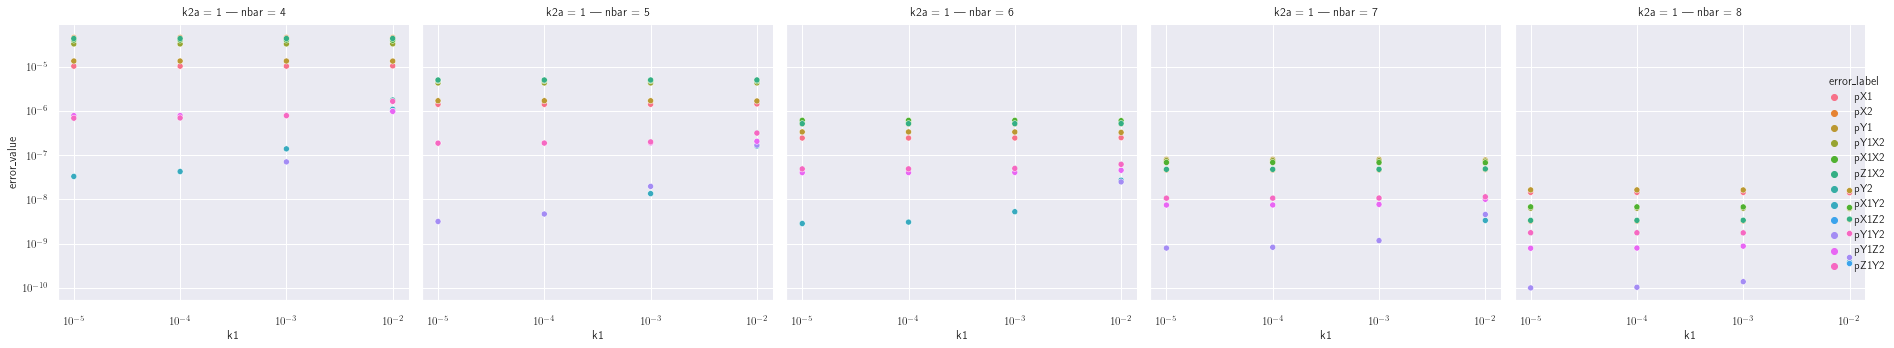

In [99]:
%%time
sns.set(rc={"figure.facecolor": "white"})
g = sns.relplot(
    data=dfs[(dfs["truncature"] == 10)],
    x="k1",
    y="error_value",
    col="nbar",
    row="k2a",
    hue="error_label",
    kind="scatter",
    markers=True,
).set(yscale="log", xscale="log")
g.add_legend()
# plt.savefig(f"asym_single_pX.pdf")

In [12]:
k2a = 1
truncature = 10
res_fit_px = []
dffp = dff[(dff["k1"] <= 1e-4)].reset_index()

res_fit_px += px_fit_from_df(
    dfxfit=dffp,
    name="FixedCNOT",
    k2a=k2a,
    truncature=truncature,
    pX_fit_function_model=log_pX_fit_function_FixedCNOT,
)
dffitpx = pd.DataFrame(res_fit_px)
dffitpx

,k2a,truncature,a,a_err,Name
0,1,10,0.504662,0.009514,FixedCNOT


In [110]:
# k2a truncature nbar a b c a_err b_err c_err
np.save("FixedCNOT_px_df.npy", dffitpx.to_numpy(), allow_pickle=True)

In [7]:
arr = np.load("FixedCNOT_px_df.npy", allow_pickle=True)
df_loaded = pd.DataFrame(
    arr,
    columns=[
        "k2a",
        "truncature",
        "a",
        "a_err",
        "Name",
    ],
)
df_loaded

,k2a,truncature,a,a_err,Name
0,1,10,0.504662,0.009514,FixedCNOT


# pZ

In [8]:
data_name = "../../../experiments/logical_gate/outcome.npy"
data_dict = np.load(data_name, allow_pickle=True).item()

new_data_name = "../../../experiments/logical_gate/outcome (1).npy"
new_data_dict = np.load(new_data_name, allow_pickle=True).item()

data_dict.update({k: v for k, v in new_data_dict.items()})

In [9]:
df = pd.DataFrame(
    [
        {
            "nbar": nbar,
            "k2a": 1,
            "k1d": k1,
            "distance": d,
            "pZL": e,
            "N": N,
            "err_pZL": error_bar(N=N, p=e),
            "Name": "FixedCNOT",
        }
        for (d, k1, nbar, N), e in data_dict.items()
    ]
)
dffit = pz_fit_from_df(df=df, name="FixedCNOT")
dffit

,k2a,nbar,pth,a,pth_err,a_err,Name,c,c_err
0,1,4,0.003557,0.018544,0.000016,0.000774,FixedCNOT,0.439329,0.002552
1,1,6,0.002787,0.027770,0.000013,0.001133,FixedCNOT,0.449655,0.002488
2,1,8,0.002246,0.033698,0.000011,0.001461,FixedCNOT,0.458811,0.002686
3,1,10,0.001866,0.036341,0.000009,0.001672,FixedCNOT,0.466058,0.002857
4,1,12,0.001604,0.035255,0.000008,0.001811,FixedCNOT,0.465300,0.002930
5,1,14,0.001389,0.036640,0.000007,0.001964,FixedCNOT,0.472066,0.003251
6,1,16,0.001243,0.042502,0.000006,0.002364,FixedCNOT,0.478138,0.003278
7,1,18,0.001114,0.044097,0.000006,0.002699,FixedCNOT,0.484194,0.003543
8,1,20,0.001012,0.041215,0.000005,0.002620,FixedCNOT,0.480679,0.003516


## Single pZL plot

In [10]:
from qsim.utils.logical_fit import FitAllAtOnce
from qsim.utils.quantum_guidelines import plot_setup

nbar = 8
k2a = 1

fit = FitAllAtOnce(max_p_L=5e-3, rel_tol=0.10)
df_partial = df[
    (df["nbar"] == nbar) & (df["k2a"] == k2a)
].reset_index()  # make sure indexes pair with number of rows
for index, row in df_partial.iterrows():
    # print(row["c1"], row["c2"])

    if error_bar(N=row["N"], p=row["pZL"]) < 0.40 * row["pZL"]:
        fit.update(
            p=row["k1d"],
            distance=row["distance"],
            pl=row["pZL"],
            num_trajectories=row["N"],
        )

nbar=8
k2a=1
fit.pth=0.0023099730660604265
fit.a=0.031341258726278035
fit.c=0.4472029941896071
fit.pth=0.0023099730660604265
171
nbar=8
k2a=1
fit.pth=0.0023099730660604265
fit.a=0.031341258726278035
fit.c=0.4472029941896071


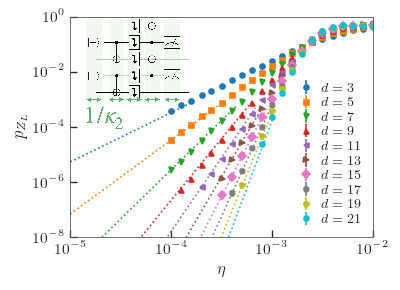

In [17]:
fig = plot_setup(1 / 1.40)
ax = fig.add_subplot()

fit.get_fit_params()
print(f"{nbar=}")
print(f"{k2a=}")
print(f"{fit.pth=}")
print(f"{fit.a=}")
print(f"{fit.c=}")

print(f"{fit.pth=}")
print(len(list(fit.data.keys())))
# fit.plot_per_cycle(
fit.plot(
    ax=ax,
    marker_list=["o", "s", "v", "^", "<", ">", "D", "X", "P"],
)

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
arr_img = plt.imread("circuit_Fixed_cnot.png")
im = OffsetImage(arr_img, zoom=.045)
im.image.axes = ax

ab = AnnotationBbox(
    im,
    xy=(0, 1),
    xycoords='axes fraction', 
    box_alignment=(-0.15, 1.02),
    frameon=False
)
ax.add_artist(ab)

print(f"{nbar=}")
print(f"{k2a=}")
print(f"{fit.pth=}")
print(f"{fit.a=}")
print(f"{fit.c=}")
plt.xlim(1e-5, 1e-2)
plt.ylim(1e-8, 1)
ax.set_title("")
ax.set_xlabel("$\\eta$")
ax.set_xscale("log")
ax.legend(
    handletextpad=0.08, labelspacing=0.2, frameon=False, loc="lower right"
)
plt.tight_layout(pad=0.3)
plt.savefig(f"FixedCNOT_fitted_{nbar}.pdf", facecolor="white", dpi=1000)
plt.show()

# Overhead

In [19]:
np.save("FixedCNOT_overhead_df.npy", dfo.to_numpy(), allow_pickle=True)

In [3]:
from qsim.logical_gate.process_results import FixedCNOT

In [4]:
from qsim.logical_gate.process_results import FixedCNOT
method = FixedCNOT()
method.load_df()
method.dfo
p_target = 10 ** (-5)
dfop = method.dfo[method.dfo['p_target'] == p_target]
dfop.sort_values('k1')

dfx
dffx
dfz
dffz
dfo


,p_target,k2a,k1,d,nbar,pXL,pZL,Name
22,0.00001,1,0.00001,3,8,0.0,0.000002,Fixed_cnot
21,0.00001,1,0.000013,3,8,0.0,0.000003,Fixed_cnot
23,0.00001,1,0.000013,3,8,0.0,0.000003,Fixed_cnot
24,0.00001,1,0.000016,3,8,0.0,0.000004,Fixed_cnot
20,0.00001,1,0.000016,3,8,0.0,0.000004,Fixed_cnot
19,0.00001,1,0.00002,5,8,0.0,0.0,Fixed_cnot
25,0.00001,1,0.00002,5,8,0.0,0.0,Fixed_cnot
26,0.00001,1,0.000025,5,8,0.0,0.0,Fixed_cnot
18,0.00001,1,0.000025,5,8,0.0,0.0,Fixed_cnot
17,0.00001,1,0.000032,5,8,0.0,0.0,Fixed_cnot


In [5]:
p_target = 10 ** (-5)
dfop = method.dfo[method.dfo['p_target'] == p_target]
dfop.sort_values('k1')

,p_target,k2a,k1,d,nbar,pXL,pZL,Name
22,0.00001,1,0.00001,3,8,0.0,0.000002,Fixed_cnot
21,0.00001,1,0.000013,3,8,0.0,0.000003,Fixed_cnot
23,0.00001,1,0.000013,3,8,0.0,0.000003,Fixed_cnot
24,0.00001,1,0.000016,3,8,0.0,0.000004,Fixed_cnot
20,0.00001,1,0.000016,3,8,0.0,0.000004,Fixed_cnot
19,0.00001,1,0.00002,5,8,0.0,0.0,Fixed_cnot
25,0.00001,1,0.00002,5,8,0.0,0.0,Fixed_cnot
26,0.00001,1,0.000025,5,8,0.0,0.0,Fixed_cnot
18,0.00001,1,0.000025,5,8,0.0,0.0,Fixed_cnot
17,0.00001,1,0.000032,5,8,0.0,0.0,Fixed_cnot


In [6]:
dfxp = method.dfx[method.dfx['k1'] == 1e-5]
dfxp

,fid,pX2,pY2,pZ2,pX1,pX1X2,pX1Y2,pX1Z2,pY1,pY1X2,...,pZ1,pZ1X2,pZ1Y2,pZ1Z2,k2a,nbar,truncature,k1,Name,pX
3,0.956694,0.000046,0.000001,0.00002,0.00001,0.00004,0.0,0.0,0.000013,0.000033,...,0.043078,0.000043,0.000001,0.000021,1,4,10,0.00001,Fixed_cnot,0.000188
7,0.964887,0.000005,0.0,0.000025,0.000001,0.000005,0.0,0.0,0.000002,0.000004,...,0.03504,0.000005,0.0,0.000025,1,5,10,0.00001,Fixed_cnot,0.000023
11,0.970462,0.000001,0.0,0.00003,0.0,0.000001,0.0,0.0,0.0,0.000001,...,0.029475,0.000001,0.0,0.00003,1,6,10,0.00001,Fixed_cnot,0.000003
15,0.974498,0.0,0.0,0.000035,0.0,0.0,0.0,0.0,0.0,0.0,...,0.025431,0.0,0.0,0.000035,1,7,10,0.00001,Fixed_cnot,0.0
19,0.977549,0.0,0.0,0.00004,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022371,0.0,0.0,0.00004,1,8,10,0.00001,Fixed_cnot,0.0


/var/folders/3s/nd608nl93j95yq_q9rfr02hc00m8zh/T/ipykernel_16363/2288915658.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.3)


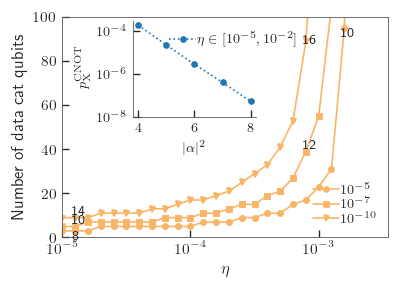

In [30]:

from qsim.utils.quantum_guidelines import *
props = global_setup(columns="twocolumn", paper="a4paper", fontsize=11)

import matplotlib.pyplot as plt

%matplotlib inline
p_target_l = [10 ** (-5), 10 ** (-7), 10 ** (-10)]

pL_labels = {
    10 ** -(5): r"$10^{-5}$",
    10 ** -(7): r"$10^{-7}$",
    10 ** -(10): r"$10^{-10}$",
}

marker_p = {
    10 ** -(5): "v-",
    10 ** -(7): "o-",
    10 ** -(10): "s-",
}

colors = plt.cm.jet(np.linspace(0, 0.3, 3))

fig = plot_setup(1 / 1.40)
ax = fig.add_subplot()
text_size = 8

ymin, ymax = 0, 100
for i, p_target in enumerate(p_target_l):
    dfop = method.dfo[method.dfo['p_target'] == p_target].sort_values('k1')
    # X, Y, label = lines[p_target]
    X = dfop['k1'].to_numpy()
    Y = dfop['d'].to_numpy()
    label = dfop['nbar'].to_numpy()
    # print((X, Y, label))
    ax.plot(X, Y, marker_list[i]+'-', label=pL_labels[p_target], color='#F9B567')
    i = 1
    z0 = None
    for x, y, z in zip(X, Y, label):
        i += 1
        if i % 2:

            if z != z0:
                if y < ymax and round(z) > 0:
                    r = 1
                    if p_target == 10 ** (-5):
                        plt.text(
                            0.95 * x,
                            y - r - 3,
                            f"{round(z,1)}",
                            fontsize=text_size,
                        )
                    else:
                        if y < 81:
                            plt.text(
                                0.95 * x,
                                y + r,
                                f"{round(z,1)}",
                                fontsize=text_size,
                            )
                        else:
                            plt.text(
                                0.95 * x,
                                y - r,
                                f"{round(z,1)}",
                                fontsize=text_size,
                            )
                z0 = z


ax.set_xlabel("$\\eta$")
ax.set_ylabel(r"Number of data cat qubits")
# ax.grid(linestyle='-', which='minor',linewidth='0.1', color='grey')

# ax.set_ylim([ymin, ymax])
ax.set_xscale("log")
ax.set_ylim(0, 100)
ax.set_xlim(1e-5, 3.5e-3)
ax.legend(
    handletextpad=0.08, labelspacing=0.2, frameon=False, loc="lower right"
)

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.325, 0.6, 0.32, 0.35]
ax2 = fig.add_axes([left, bottom, width, height])
rect = ax2.patch
rect.set_alpha(0)

k1_labels = [
    "$\\kappa_1 = 10^{-5}$",
    "$\\kappa_1 = 10^{-4}$",
    "$\\kappa_1 = 10^{-3}$",
    "$\\kappa_1 = 10^{-2}$",
]

dfxp = method.dfx[method.dfx['k1'] == 1e-5].sort_values('nbar')
# for i, k1 in enumerate(sorted(list(set(k1_fit_l)))):
ax2.plot(
    dfxp['nbar'].to_numpy(),
    dfxp['pX'].to_numpy(),
    'o:',
    label=r'$\eta \in [10^{-5}, 10^{-2}]$'
)
ax2.set_prop_cycle(None)
ax2.set_ylim(1e-8, 3e-4)

ax2.legend(
    handletextpad=0.08,
    labelspacing=0.2,
    frameon=False,
    bbox_to_anchor=(0.2, 1),
    loc="upper left",
)
ax2.set_yscale("log")
ax2.set_xlabel("$|\\alpha|^2$", fontsize=8)
ax2.set_ylabel("$p_\mathrm{X}^{\mathrm{CNOT}}$", fontsize=8)
ax2.tick_params(axis="both", which="major", labelsize=8)
ax2.tick_params(axis="both", which="minor", labelsize=8)


ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)

plt.tight_layout(pad=0.3)
plt.savefig("overhead_only_data_fixedcnot.pdf")
plt.show()

